In [1]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wandb

In [2]:
run = wandb.init()

artifact_name = "duktig/same-different-shape-classifier/run-j2v10sdx-result:v0"

artifact = run.use_artifact(artifact_name, type='run_table')
artifact_dir = artifact.download()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: duktig. Use `wandb login --relogin` to force relogin


wandb: Downloading large artifact run-j2v10sdx-result:v0, 20.35MB. 6145 files... 
wandb:   6145 of 6145 files downloaded.  
Done. 0:0:15.8


In [3]:
with open(
    os.path.join(artifact_dir, "result.table.json"),
    "r",
    encoding="utf-8"
) as reader:
    table = json.load(reader)

In [4]:
res = pd.DataFrame(table["data"], columns=table["columns"])
res

,source,target,matched,phi_source,phi_target,phi_estimated,mse_score,steps,prediction,label
0,"{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...",-103.306725,-40.535589,-40.894664,0.003143,7,1,1.0
1,"{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...",-15.424129,15.862781,14.425117,0.001989,7,1,1.0
2,"{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...",9.766166,30.074960,32.379231,0.011763,6,0,1.0
3,"{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...",202.392975,63.227120,64.001015,0.004218,10,1,1.0
4,"{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...",-129.597046,-60.789057,-61.757850,0.001883,10,1,1.0
...,...,...,...,...,...,...,...,...,...,...
2043,"{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...",-135.412460,-58.289935,-185.161204,0.022855,10,0,0.0
2044,"{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...",-210.569366,-71.535625,-347.152281,0.026171,26,0,0.0
2045,"{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...",118.816780,74.242580,172.183614,0.023757,20,0,0.0
2046,"{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...",-32.533459,-70.243968,-203.488233,0.028819,27,0,0.0


In [5]:
res.drop(columns=["source", "target", "matched"], inplace=True)

In [6]:
print(f"Accuracy: {100 * np.sum(res['prediction'] == res['label']) / len(res):.2f}%")

Accuracy: 96.68%


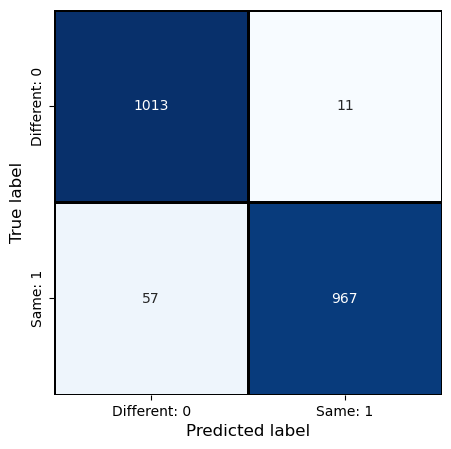

In [7]:
from sklearn import metrics
import seaborn as sns


cm = metrics.confusion_matrix(res['label'], res['prediction'])

figure, axis = plt.subplots(figsize=(5, 5))

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap=plt.cm.Blues,
    linecolor="black",
    linewidths=1.,
    cbar=False,
    xticklabels=("Different: 0", "Same: 1"),
    yticklabels=("Different: 0", "Same: 1"),
    ax=axis
)

axis.set_xlabel("Predicted label", fontsize=12)
axis.set_ylabel("True label", fontsize=12);

In [8]:
res["rotation"] = abs(round(res["phi_target"] - res["phi_source"]))

In [9]:
correct = res[res['prediction'] == res['label']].reset_index()

In [10]:
BIN_LABELS = (0, 50, 100, 150)

In [11]:
correct["bin"] = pd.cut(correct["rotation"], bins=[0, 45, 90, 135, 180], labels=BIN_LABELS)
correct

,index,phi_source,phi_target,phi_estimated,mse_score,steps,prediction,label,rotation,bin
0,0,-103.306725,-40.535589,-40.894664,0.003143,7,1,1.0,63.0,50
1,1,-15.424129,15.862781,14.425117,0.001989,7,1,1.0,31.0,0
2,3,202.392975,63.227120,64.001015,0.004218,10,1,1.0,139.0,150
3,4,-129.597046,-60.789057,-61.757850,0.001883,10,1,1.0,69.0,50
4,5,50.900921,-62.535478,-62.164406,0.001531,10,1,1.0,113.0,100
...,...,...,...,...,...,...,...,...,...,...
1975,2043,-135.412460,-58.289935,-185.161204,0.022855,10,0,0.0,77.0,50
1976,2044,-210.569366,-71.535625,-347.152281,0.026171,26,0,0.0,139.0,150
1977,2045,118.816780,74.242580,172.183614,0.023757,20,0,0.0,45.0,0
1978,2046,-32.533459,-70.243968,-203.488233,0.028819,27,0,0.0,38.0,0


In [12]:
n_bins = round(np.sqrt(np.mean([np.sum(correct["bin"] == label) for label in BIN_LABELS])))
_, bins = np.histogram(correct["steps"], density=False, bins=n_bins)

bin_width = np.diff(bins)[0]
bin_pos =(bins[:-1] + bin_width / 2)

In [13]:
def barplot(bins, data, axis):
    for label, sign, color in zip((1, 0), (1, -1), (plt.cm.tab20.colors[1], plt.cm.tab20.colors[3])):
        heights, _ = np.histogram(data[data["label"] == label]["steps"], bins=bins, density=False)
        heights *= sign
        
        axis.barh(bin_pos, heights, height=bin_width, color=color, edgecolor="k")
        


def meanplot(data, axis):
    for label, color in zip((1, 0), (plt.cm.tab20.colors[0], plt.cm.tab20.colors[2])):
        axis.scatter(0, np.mean(data[data["label"] == label]["steps"]), color=color, s=150, marker="X", edgecolors="black")

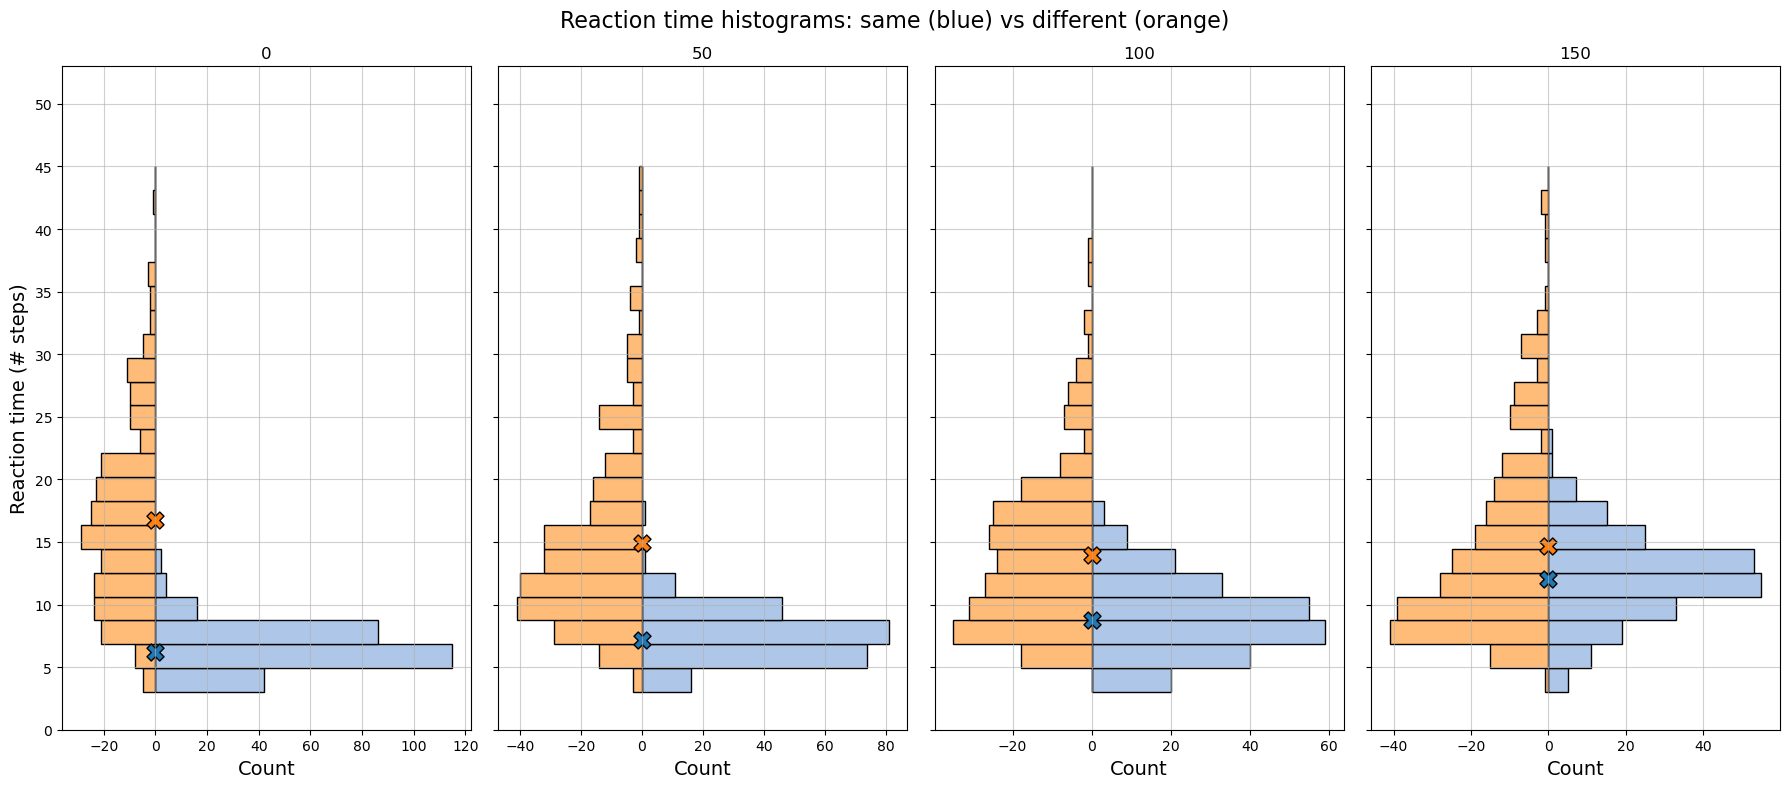

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(18, 8), sharey=True, layout="tight")

REACT_TIME_MIN = 0
REACT_TIME_MAX = 50

axes[0].set_ylim(REACT_TIME_MIN, REACT_TIME_MAX + 3)
axes[0].set_yticks(np.arange(REACT_TIME_MIN, REACT_TIME_MAX + 3, 5))
axes[0].set_ylabel("Reaction time (# steps)", fontsize=14)

for idx, label in enumerate(BIN_LABELS):
    barplot(bins, correct[correct["bin"] == label], axes[idx])
    meanplot(correct[correct["bin"] == label], axes[idx])

   # axes[idx].set_xticklabels([-val if val < 0 else val for val in np.arange(-10, 30, 5)])
    axes[idx].set_xlabel("Count", fontsize=14)
    axes[idx].set_title(f"{label:.0f}", fontsize=12)

    axes[idx].grid(zorder=-10, alpha=0.6)


fig.suptitle("Reaction time histograms: same (blue) vs different (orange)", fontsize=16);